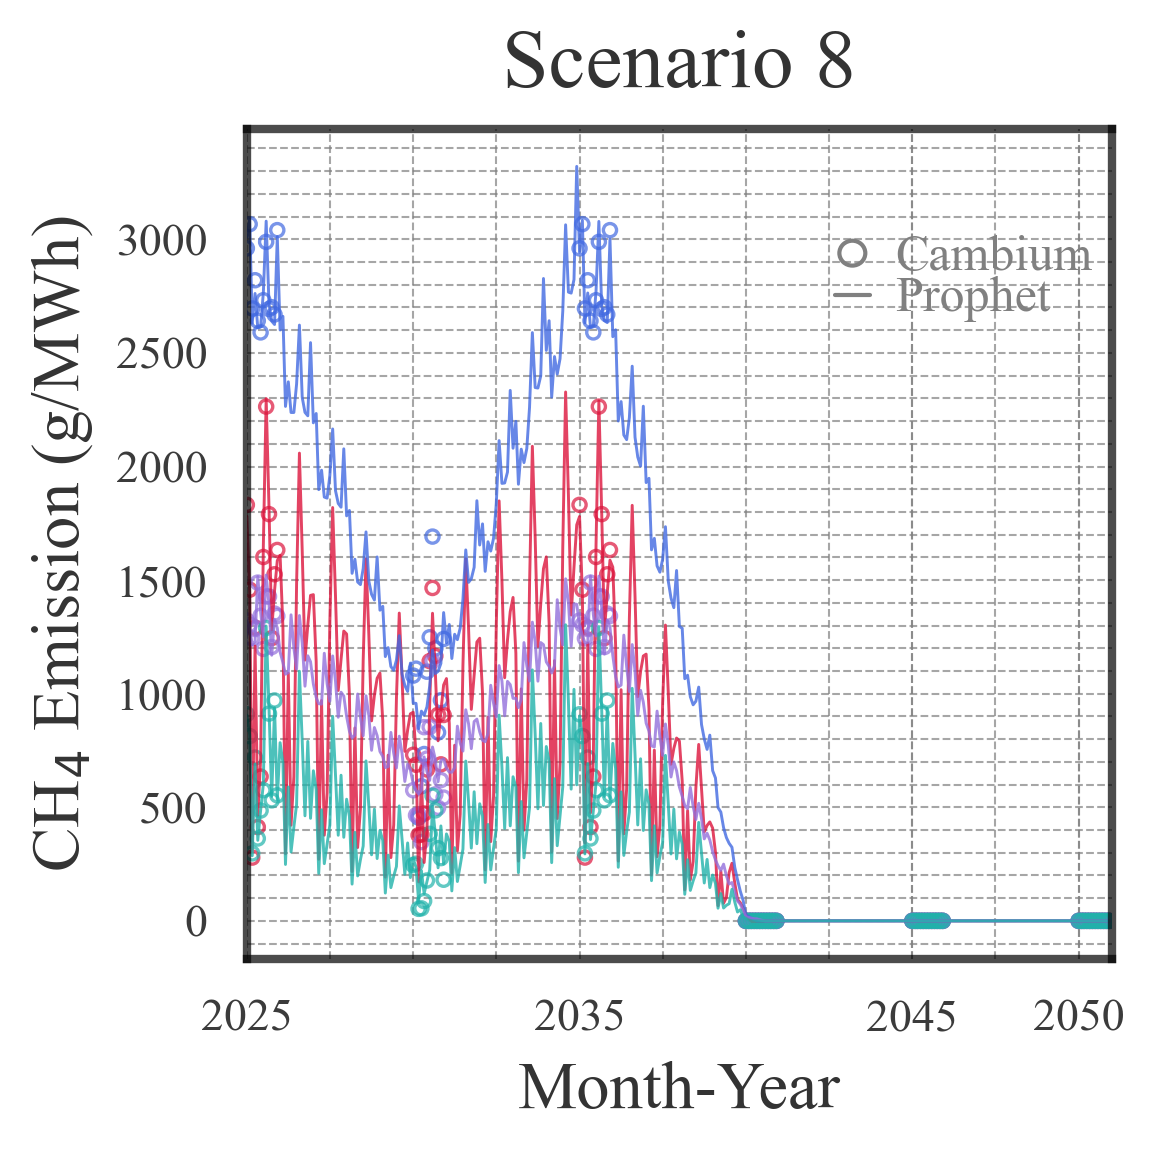

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.patches as patches
from matplotlib.lines import Line2D

# Define file paths for each state's CH4 emissions data
file_paths = {
    'California': r'C:\Users\skanigir\epa\Scripts\notebooks\GRA\Cambium\Main\2023\data\CH4\california\harmonicmean\results\ch4_cal_forecasted_results.xlsx',
    'Georgia': r'C:\Users\skanigir\epa\Scripts\notebooks\GRA\Cambium\Main\2023\data\CH4\georgia\harmonicmean\results\ch4_geo_forecasted_results.xlsx',
    'New York': r'C:\Users\skanigir\epa\Scripts\notebooks\GRA\Cambium\Main\2023\data\CH4\newyork\harmonicmean\results\ch4_new_forecasted_results.xlsx',
    'Washington': r'C:\Users\skanigir\epa\Scripts\notebooks\GRA\Cambium\Main\2023\data\CH4\washington\harmonicmean\results\ch4_was_forecasted_results.xlsx'
}

# Define the output path for saving the graphs
output_path = r'C:\Users\skanigir\epa\Scripts\notebooks\GRA\Cambium\Main\2023\graphs'

Scenario = "Scenario 8"
Emission = "CH$_4$ Emission (g/MWh)"  
figure = "1_c_8"

# Define colors for each state using HUSL palette
colors = ['crimson','royalblue','mediumpurple','lightseagreen']

# Set the plot style
sns.set(style="whitegrid")

# Set the font to Times New Roman
plt.rcParams["font.family"] = "Times New Roman"

# Create the main plot
fig, ax = plt.subplots(figsize=(4, 4), dpi=300)  # Increased height for space at the bottom
scatter_lines = []

# Iterate over each state and plot the data
for (state, file_path), color in zip(file_paths.items(), colors):
    # Read the actual and forecasted data
    actual_data = pd.read_excel(file_path, sheet_name='hm_actual_100%_Decarbonization_')
    forecast_data = pd.read_excel(file_path, sheet_name='hm_forecast_100%_Decarbonizatio')
    
    # Plot actual emissions with hollow markers
    scatter = ax.scatter(actual_data['ds'], actual_data['y'], marker='o', facecolors='none', edgecolors=color, alpha=0.7, s=10, linewidth=0.8)
    
    # Plot predicted emissions with a line only
    line, = ax.plot(forecast_data['ds'], forecast_data['yhat'], linestyle='-', alpha=0.8, color=color, linewidth=0.7)
    
    scatter_lines.append((scatter, line, state))

# Labels and title
ax.set_xlabel('Month-Year', labelpad=5, fontsize=16, color='black', alpha=0.8)
ax.set_ylabel(Emission, labelpad=5, fontsize=16, color='black', alpha=0.8)
ax.set_title(Scenario, pad=10, fontsize=20, color='black', alpha=0.8)

# Set x-axis limit to 2050
ax.set_xlim([pd.Timestamp('2025-01-01'), pd.Timestamp('2050-12-31')])

# Set x-axis ticks to show specific years with a 6-year gap, ensuring 2024 and 2050 are included
years = [pd.Timestamp(f'{year}-01-01') for year in range(2025, 2051, 10)]
if pd.Timestamp('2050-01-01') not in years:
    years.append(pd.Timestamp('2050-01-01'))
ax.set_xticks(sorted(years))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

for label in ax.get_xticklabels():
    label.set_alpha(0.9) 
for label in ax.get_yticklabels():
    label.set_alpha(0.9) 

# Add annotation with aligned text for MOVES 4.0 and FNN Model
circle = patches.Circle((0.70, 0.85), 0.015, transform=ax.transAxes, fill=False, edgecolor='gray', linewidth=1)
ax.add_patch(circle)
line = Line2D([0.68, 0.72], [0.80, 0.80], transform=ax.transAxes, color='gray', linewidth=1)
ax.add_line(line)
ax.annotate('Cambium', xy=(0.75, 0.83), xycoords='axes fraction', fontsize=12, color='gray', ha='left')
ax.annotate('Prophet', xy=(0.75, 0.78), xycoords='axes fraction', fontsize=12, color='gray', ha='left')

# Grid and legend
ax.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
ax.minorticks_on()
ax.grid(which='minor', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Set background color
ax.set_facecolor('white')
fig.set_facecolor('white')

# Set dark black border
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_alpha(0.7)
    spine.set_linewidth(2)

# Save the main plot
#plt.savefig(f'{output_path}/{figure}.svg', format='svg')

# Show the main plot
plt.show()


In [5]:
# Define state abbreviations
state_short = {
    'California': 'CA',
    'Georgia': 'GA',
    'New York': 'NY',
    'Washington': 'WA'
}
output_path = r'C:\Users\skanigir\epa\Scripts\notebooks\GRA\Cambium\Main\2023\graphs'
colors = ['crimson','royalblue','mediumpurple','lightseagreen']
# Create the custom legend as a separate plot
fig_legend, ax_legend = plt.subplots(figsize=(10, 1), dpi = 300)
ax_legend.axis('off')  # Hide axes

# Custom legend area
for i, (state, color) in enumerate(zip(state_short.keys(), colors)):
    # Positioning the markers, lines, and labels with gaps
    ax_legend.plot([0.1 + i * 0.2], [0.5], marker='o', markerfacecolor='none', markeredgecolor=color, markersize=8,linewidth = 3, linestyle='', label=state , alpha = 0.9)
    ax_legend.plot([0.12 + i * 0.2, 0.15 + i * 0.2], [0.5, 0.5], color=color, alpha=0.8)
    ax_legend.text(0.17 + i * 0.2, 0.5, state, fontsize=16, ha='left', va='center',)

# Save the legend plot
#plt.savefig(f'{output_path}/legend1.svg', format='svg')



In [6]:
# Define state abbreviations
state_short = {
    'California': 'CA',
    'Georgia': 'GA',
    'New York': 'NY',
    'Washington': 'WA'
}
output_path = r'C:\Users\skanigir\epa\Scripts\notebooks\GRA\Cambium\Main\2023\graphs'
colors = ['crimson','royalblue','mediumpurple','lightseagreen']
# Create the custom legend as a separate plot
fig_legend, ax_legend = plt.subplots(figsize=(10, 1), dpi = 300)
ax_legend.axis('off')  # Hide axes

# Custom legend area
for i, (state, color) in enumerate(zip(state_short.keys(), colors)):
    # Positioning the markers, lines, and labels with gaps
    #ax_legend.plot([0.1 + i * 0.2], [0.5], marker='o', markerfacecolor='none', markeredgecolor=color, markersize=8,linewidth = 3, linestyle='', label=state , alpha = 0.9)
    ax_legend.plot([0.12 + i * 0.2, 0.15 + i * 0.2], [0.5, 0.5], color=color, alpha=0.8)
    ax_legend.text(0.17 + i * 0.2, 0.5, state, fontsize=16, ha='left', va='center',)

# Save the legend plot
#plt.savefig(f'{output_path}/legend2.svg', format='svg')
